In [61]:
import numpy as np
import pandas as pd
df_train = pd.read_csv('/Users/ethanmc/git-repos/kaggle/challenge-one/decision-tree-mobile-data/kaggle/input/train.csv')
df_test = pd.read_csv('/Users/ethanmc/git-repos/kaggle/challenge-one/decision-tree-mobile-data/kaggle/input/test.csv')

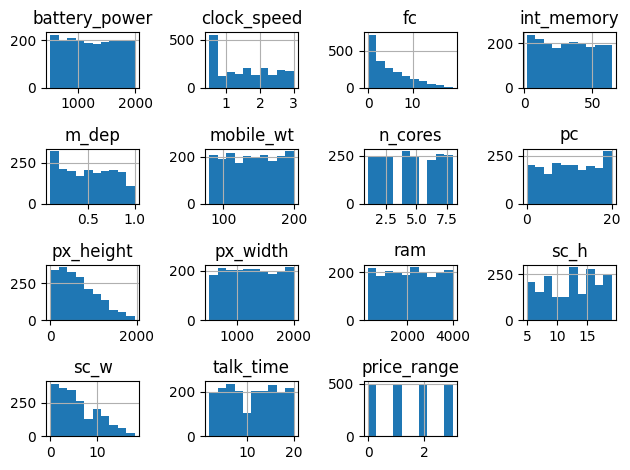

In [62]:
import matplotlib.pyplot as plt
df_train
df_train.drop(['blue','dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], axis=1).hist()
plt.tight_layout()
plt.show()

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import accuracy_score

result = []

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['price_range'], axis=1), 
                                                        df_train['price_range'],
                                                        test_size = 0.33, random_state = i)

    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    result.append(accuracy_score(y_test, y_pred))

result_series = pd.Series(result)

result_series.describe()

count    100.000000
mean       0.822682
std        0.015350
min        0.784848
25%        0.814773
50%        0.822727
75%        0.834848
max        0.851515
dtype: float64

In [64]:
# let's combine some features in intelligent ways to make new features. Hopefully this will improve our accuracy score

# screen size correlation with price?
X_train['screen_area'] = X_train['sc_h'] * X_train['sc_w']
X_test['screen_area'] = X_test['sc_h'] * X_test['sc_w']

print(X_train['screen_area'].corr(y_train))

# really poor correlation. Don't need to use this.

0.04735910263677245


In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import accuracy_score

result = []

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['price_range'], axis=1), 
                                                        df_train['price_range'],
                                                        test_size = 0.33, random_state = i)

    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    result.append(accuracy_score(y_test, y_pred))

result_series = pd.Series(result)

result_series.describe()

count    100.000000
mean       0.822712
std        0.016390
min        0.781818
25%        0.813258
50%        0.821970
75%        0.833333
max        0.853030
dtype: float64

<Axes: xlabel='price_range'>

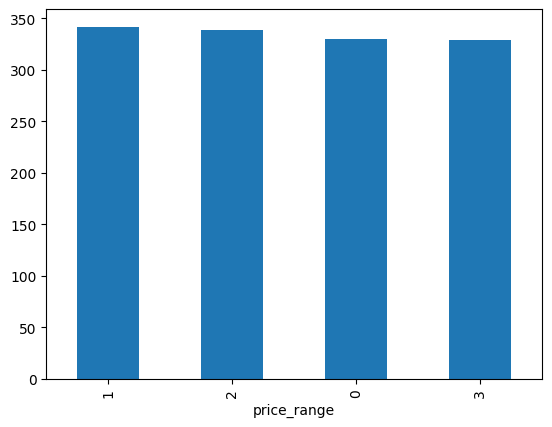

In [66]:
# So we don't need SMOTE (evenly distributed classes)
y_train.value_counts().plot(kind='bar')
y_test.value_counts().plot(kind='bar')

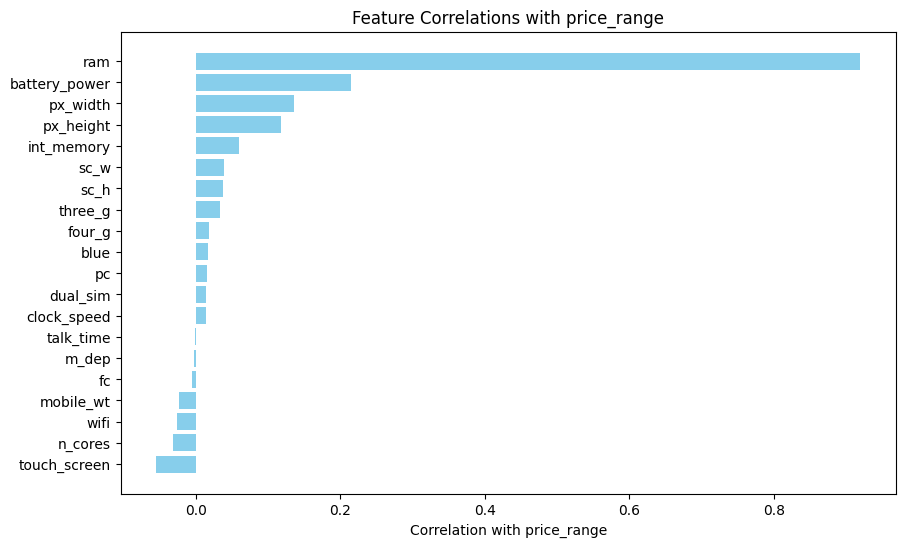

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlations for each feature with the target
correlations = {}

for column in X_train.columns:
    corr_value = X_train[column].corr(y_train)
    correlations[column] = corr_value

# Convert dictionary to lists for plotting
features = list(correlations.keys())
correlation_values = list(correlations.values())

# Sort the features by correlation
sorted_idx = np.argsort(correlation_values)[::-1]  # Sort in descending order
sorted_features = [features[i] for i in sorted_idx]
sorted_correlations = [correlation_values[i] for i in sorted_idx]

# Plotting the correlations as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_correlations, color='skyblue')
plt.xlabel('Correlation with price_range')
plt.title('Feature Correlations with price_range')
plt.gca().invert_yaxis()  # Invert y-axis to show highest correlations at the top
plt.show()


In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

from sklearn import tree
from sklearn.metrics import accuracy_score


select_columns = ['ram', 'battery_power', 'px_height', 'px_width']

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(df_train[select_columns], 
                                                        df_train['price_range'],
                                                        test_size = 0.33, random_state = i)
    # scaler = MinMaxScaler()
    # X_train = pd.DataFrame(scaler.fit_transform(X_train))
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    result.append(accuracy_score(y_test, y_pred))

result_series = pd.Series(result)

result_series.describe()

count    900.000000
mean       0.646902
std        0.281809
min        0.200000
25%        0.259091
50%        0.834848
75%        0.853030
max        0.892424
dtype: float64